# Mod1/L9 Method of Moments Estimation

## Introduction
Method of moments (MoM) is a technique for constructing estimators of parameters by equating sample moments with population moments.

## Population vs Sample Moments
### Population Moments
$\mu_k = E[X^k]$ (kth population moment) where:
- First moment: $\mu_1 = E[X]$ (mean)
- Second moment: $\mu_2 = E[X^2]$

### Sample Moments
$m_k = \frac{1}{n}\sum_{i=1}^n X_i^k$ (kth sample moment) where:

- First moment: $\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$ (sample mean)
- Second moment: $m_2 = \frac{1}{n}\sum_{i=1}^n X_i^2$

## Examples

### 1. Exponential Distribution
For $X \sim \text{Exp}(\lambda)$:
- $E[X] = \frac{1}{\lambda}$
- MoM estimator: $\hat{\lambda} = \frac{1}{\bar{X}}$

True lambda: 0.500


MoM estimator: 0.478


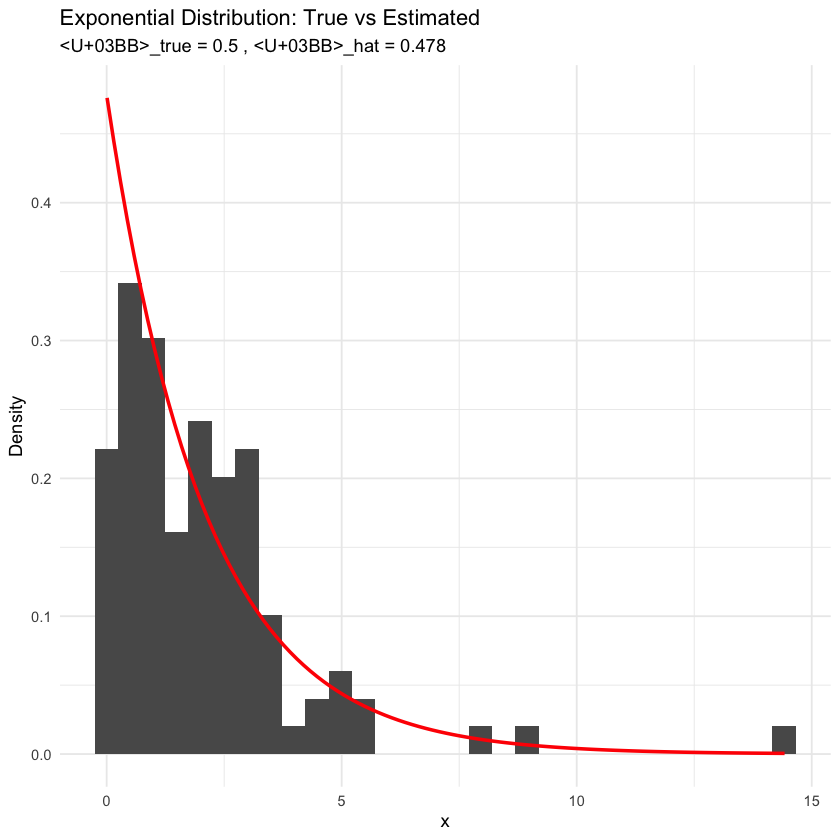

In [ ]:
# Example: Exponential Distribution
library(ggplot2)

# Generate sample from exponential distribution
set.seed(123)
lambda_true <- 0.5
n <- 100
x <- rexp(n, rate = lambda_true)

# Calculate MoM estimator
lambda_hat <- 1/mean(x)

# Compare with true value
cat(sprintf("True lambda: %.3f\n", lambda_true))
cat(sprintf("MoM estimator: %.3f\n", lambda_hat))

# Visualize
ggplot(data.frame(x = x), aes(x = x)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30) +
  stat_function(
    fun = dexp, 
    args = list(rate = lambda_hat), 
    color = "red", 
    linewidth = 1
  ) +
  labs(
    title = "Exponential Distribution: True vs Estimated",
    subtitle = paste("lambda_true =", lambda_true, ", lambda_hat =", round(lambda_hat, 3)),
    x = "x",
    y = "Density"
  ) +
  theme_minimal()

### 2. Gamma Distribution
For $X \sim \text{Gamma}(\alpha, \beta)$:
- $E[X] = \frac{\alpha}{\beta}$
- $E[X^2] = \frac{\alpha(\alpha + 1)}{\beta^2}$

True parameters: alpha = 2.000, beta = 1.000
MoM estimators: alpha_hat = 2.167, beta_hat = 1.133


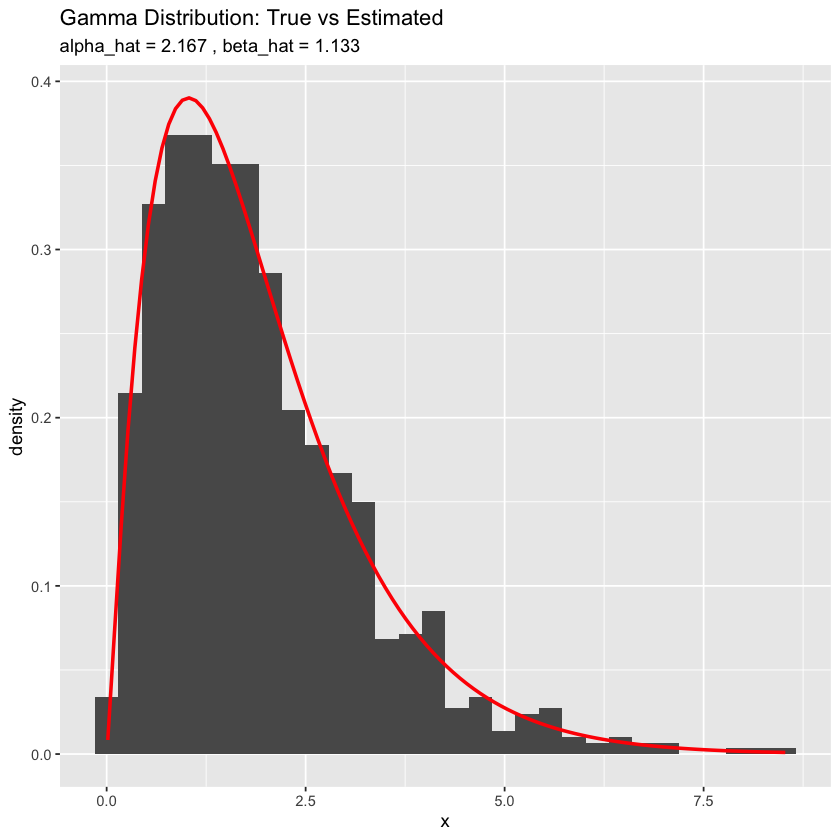

In [2]:
# Example: Gamma Distribution
# Generate sample from gamma distribution
alpha_true <- 2
beta_true <- 1
n <- 1000
x <- rgamma(n, shape = alpha_true, rate = beta_true)

# Calculate sample moments
m1 <- mean(x)
m2 <- mean(x^2)

# Solve for alpha and beta
beta_hat <- m1/(m2 - m1^2)
alpha_hat <- m1 * beta_hat

# Compare with true values
cat(sprintf("True parameters: alpha = %.3f, beta = %.3f\n", alpha_true, beta_true))
cat(sprintf("MoM estimators: alpha_hat = %.3f, beta_hat = %.3f\n", alpha_hat, beta_hat))

# Visualize
ggplot(data.frame(x = x), aes(x = x)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30) +
  stat_function(fun = dgamma, 
               args = list(shape = alpha_hat, rate = beta_hat),
               color = "red", linewidth = 1) +
  labs(title = "Gamma Distribution: True vs Estimated",
       subtitle = paste("alpha_hat =", round(alpha_hat, 3), 
                       ", beta_hat =", round(beta_hat, 3)))

# Method of Moments Estimation
This is a second attempt at describing the MoM method

## Introduction
Method of Moments (MoM) provides parameter estimates by equating sample moments with theoretical moments.

## Theoretical Framework

### Population Moments
$\mu_k = E[X^k]$ where:
- First moment (mean): $\mu_1 = E[X]$
- Second moment: $\mu_2 = E[X^2]$

### Sample Moments
$m_k = \frac{1}{n}\sum_{i=1}^n X_i^k$ where:
- First moment: $\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$
- Second moment: $m_2 = \frac{1}{n}\sum_{i=1}^n X_i^2$

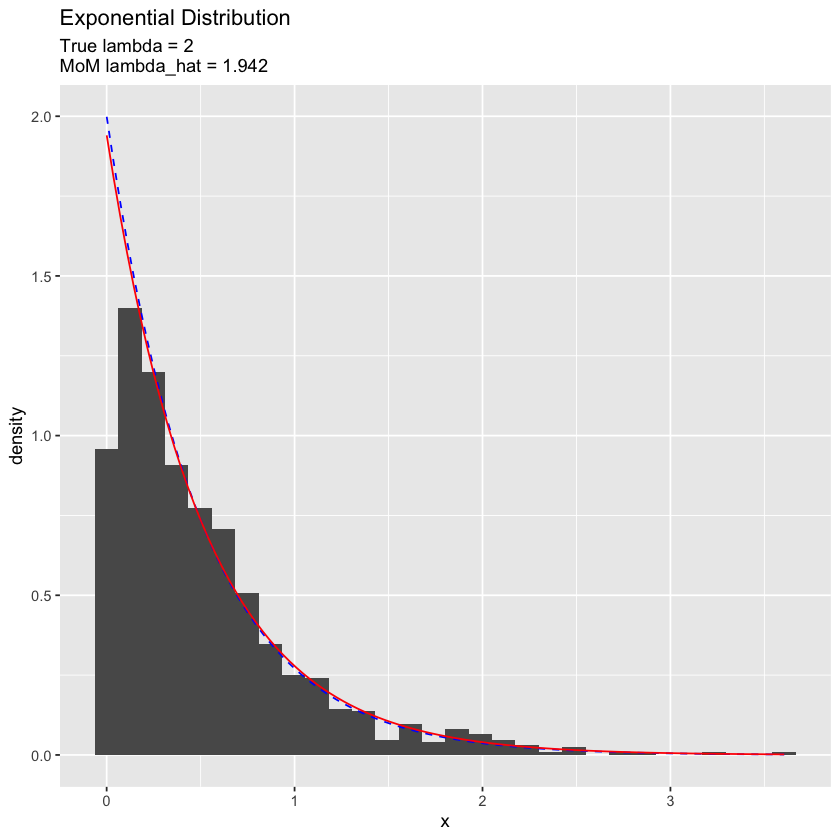

Exponential Distribution Results:
True lambda: 2.000
MoM lambda_hat: 1.942
Unbiased lambda_hat: 1.940

Gamma Distribution Results:
True (alpha,beta): (2.000, 1.000)
MoM (alpha_hat,beta_hat): (2.086, 1.081)


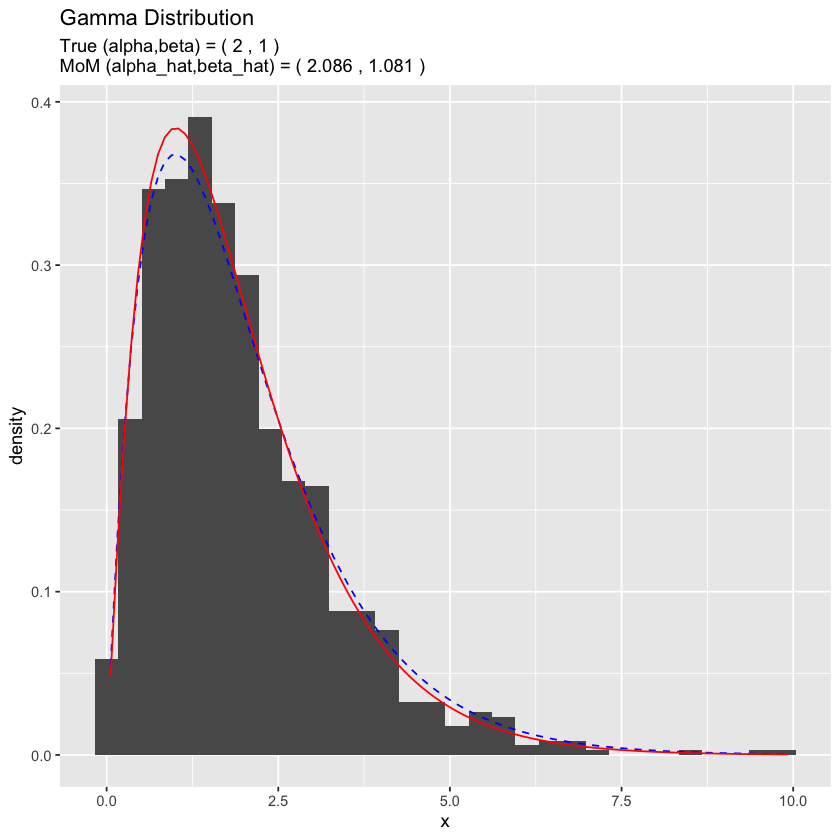

In [4]:
# Load required libraries
library(ggplot2)
# library(gridExtra)

# Helper function to calculate sample moments
calculate_moments <- function(x, k=2) {
    moments <- numeric(k)
    for(i in 1:k) {
        moments[i] <- mean(x^i)
    }
    return(moments)
}

# Example 1: Exponential Distribution
set.seed(123)
n <- 1000
lambda_true <- 2

# Generate sample
x_exp <- rexp(n, rate=lambda_true)

# Calculate MoM estimator
lambda_hat <- 1/mean(x_exp)

# Bias-corrected estimator
lambda_hat_unbiased <- (n-1)/(n*mean(x_exp))

# Visualize
p1 <- ggplot(data.frame(x=x_exp), aes(x=x)) +
    geom_histogram(aes(y=after_stat(density)), bins=30) +
    stat_function(fun=dexp, args=list(rate=lambda_true), 
                 color="blue", linetype="dashed") +
    stat_function(fun=dexp, args=list(rate=lambda_hat), 
                 color="red") +
    labs(title="Exponential Distribution",
         subtitle=paste("True lambda =", lambda_true, 
                       "\nMoM lambda_hat =", round(lambda_hat,3)))

# Example 2: Gamma Distribution
alpha_true <- 2
beta_true <- 1

# Generate sample
x_gamma <- rgamma(n, shape=alpha_true, rate=beta_true)

# Calculate moments
m1 <- mean(x_gamma)
m2 <- mean(x_gamma^2)

# MoM estimators
beta_hat <- m1/(m2 - m1^2)
alpha_hat <- m1 * beta_hat

# Visualize
p2 <- ggplot(data.frame(x=x_gamma), aes(x=x)) +
    geom_histogram(aes(y= after_stat(density)), bins=30) +
    stat_function(fun=dgamma, 
                 args=list(shape=alpha_true, rate=beta_true),
                 color="blue", linetype="dashed") +
    stat_function(fun=dgamma, 
                 args=list(shape=alpha_hat, rate=beta_hat),
                 color="red") +
    labs(title="Gamma Distribution",
         subtitle=paste("True (alpha,beta) = (", alpha_true, ",", beta_true, ")",
                       "\nMoM (alpha_hat,beta_hat) = (", 
                       round(alpha_hat,3), ",", round(beta_hat,3), ")"))

# Display results
# grid.arrange(p1, p2, ncol=2)
p1
p2

# Print numerical results
cat("Exponential Distribution Results:\n")
cat(sprintf("True lambda: %.3f\n", lambda_true))
cat(sprintf("MoM lambda_hat: %.3f\n", lambda_hat))
cat(sprintf("Unbiased lambda_hat: %.3f\n\n", lambda_hat_unbiased))

cat("Gamma Distribution Results:\n")
cat(sprintf("True (alpha,beta): (%.3f, %.3f)\n", alpha_true, beta_true))
cat(sprintf("MoM (alpha_hat,beta_hat): (%.3f, %.3f)\n", alpha_hat, beta_hat))

## Next Lesson (Mod2): Maximum Likelihood Estimator

(refer to [mod2_summarytranscript_L1_MaximumLikelihoodMLE.ipynb](mod2_summarytranscript_L1_MaximumLikelihoodMLE.ipynb))